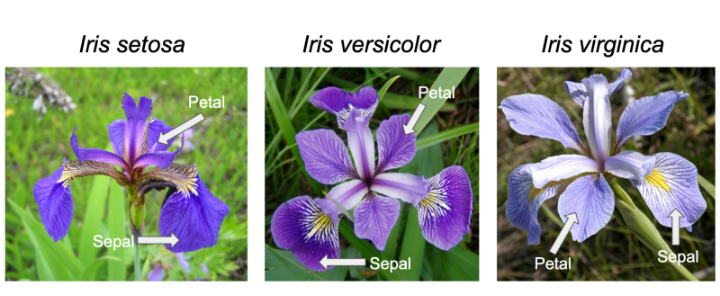

# Iris Flower Classification

The Iris dataset is a well-known dataset in machine learning and contains information about iris flowers. It consists of 150 samples from three different species of iris (Iris setosa, Iris virginica, and Iris versicolor). For each flower, the dataset provides the following four features:

1. **Sepal Length (cm)**: The length of the iris flower's sepal (the green leaf-like structure at the base of the flower).

2. **Sepal Width (cm)**: The width of the iris flower's sepal.

3. **Petal Length (cm)**: The length of the iris flower's petal (the colorful part of the flower).

4. **Petal Width (cm)**: The width of the iris flower's petal.

Each of these features is a numeric measurement in centimeters and is used to classify iris flowers into one of the three species based on these feature values. The dataset also includes a target variable, which is the species of the iris, making it a supervised classification problem.

In summary, the Iris dataset consists of the following features:
- Sepal Length (cm)
- Sepal Width (cm)
- Petal Length (cm)
- Petal Width (cm)

These features are used to classify iris flowers into the following species:
- Iris setosa
- Iris versicolor
- Iris virginica

It's a widely used dataset for practicing classification and machine learning algorithms.

# Import the required Libraries

In [1]:
import numpy as np  # Import the numpy library for numerical operations
import pandas as pd  # Import the pandas library for data manipulation
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting
import seaborn as sns  # Import the seaborn library for enhanced data visualization

from sklearn.model_selection import train_test_split  # Import train_test_split function for splitting data
from sklearn.linear_model import LogisticRegression  # Import the Logistic Regression model
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for encoding categorical data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Import metrics for model evaluation

In [2]:
import warnings  # Import warnings module to suppress warnings
warnings.filterwarnings('ignore')  # Set warnings to be ignored

# Load the Dataset

In [3]:
# Read the Iris dataset from a CSV file named "Iris.csv"
iris=pd.read_csv("Iris.csv")
# Display the first 5 rows of the 'iris' DataFrame using the 'head' method
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Preprocessing

In [4]:
# Drop the 'Id' column from the 'iris' DataFrame along the column axis (axis=1)
iris.drop('Id',axis=1,inplace=True)

In [5]:
# Display a random sample of 5 rows from the 'iris' DataFrame using the 'sample' method
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
64,5.6,2.9,3.6,1.3,Iris-versicolor
32,5.2,4.1,1.5,0.1,Iris-setosa
146,6.3,2.5,5.0,1.9,Iris-virginica
98,5.1,2.5,3.0,1.1,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa


In [6]:
# Get the dimensions (number of rows and columns) of the 'iris' DataFrame using 'shape'
iris.shape

(150, 5)

In [7]:
# Check for missing values in the 'iris' DataFrame using the 'isnull' method
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Understanding and Exploration

In [8]:
# Display information about the 'iris' DataFrame including column data types and non-null values using 'info'
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Generate descriptive statistics of the 'iris' DataFrame
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [10]:
# Get summary statistics of the 'Species' column in the 'iris' DataFrame using 'describe'
iris['Species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [11]:
# Count the number of occurrences of each unique value in the 'Species' column using 'value_counts'
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Correlation Matrix

In [12]:
# Calculate the correlation matrix of the numeric columns in the 'iris' DataFrame using 'corr'
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


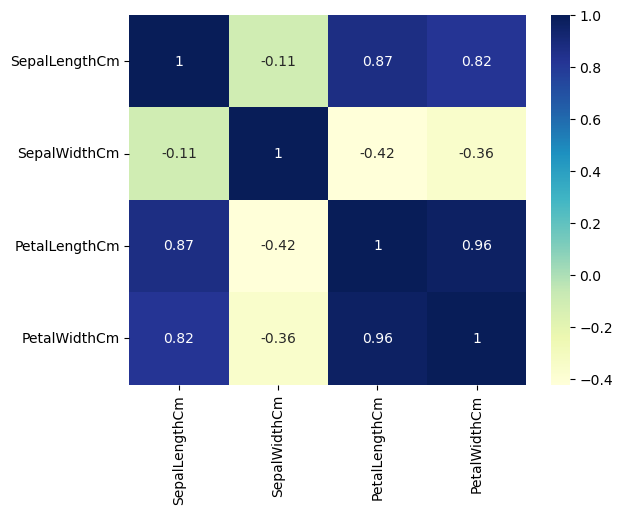

In [13]:
# Create a heatmap to visualize the correlation matrix
sns.heatmap(iris.corr(),annot=True,cmap='YlGnBu')
# Display the heatmap
plt.show()

# Exploratory Data Analysis (EDA)

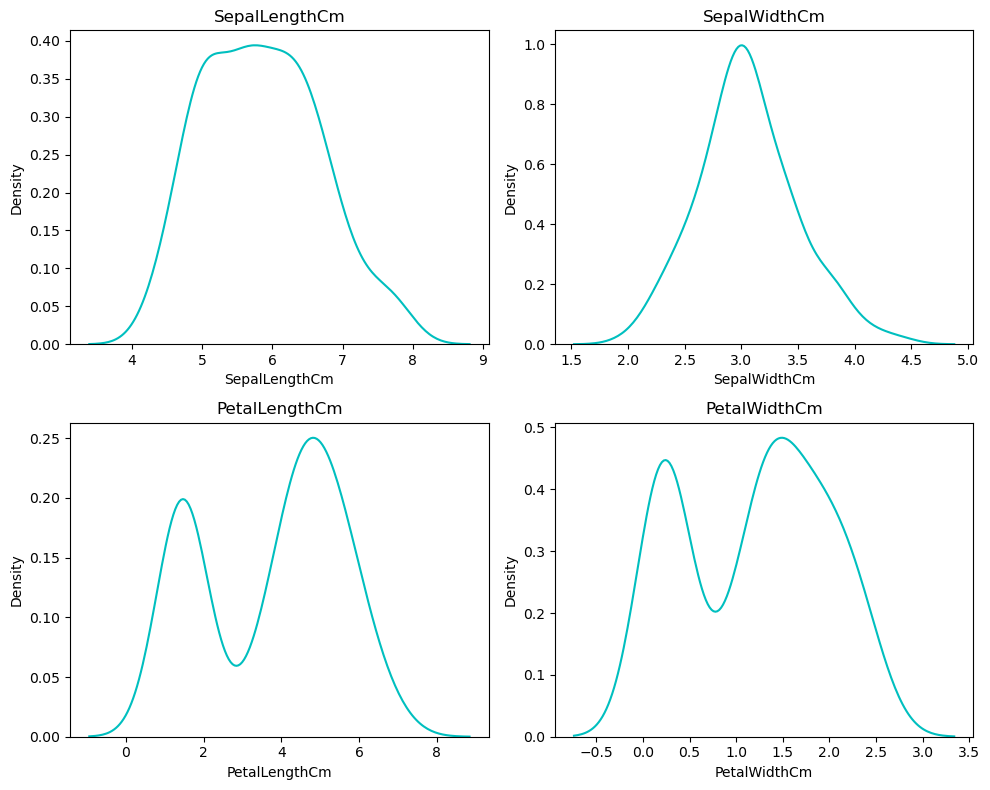

In [14]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Loop through numeric columns and create distplot
for i, col in enumerate(iris.select_dtypes(np.number).columns, 1):
    plt.subplot(2, 2, i)
    sns.distplot(iris[col],color='c',hist=False)
    plt.title(col)

# Adjust subplot layout and display the plot
plt.tight_layout()
plt.show()

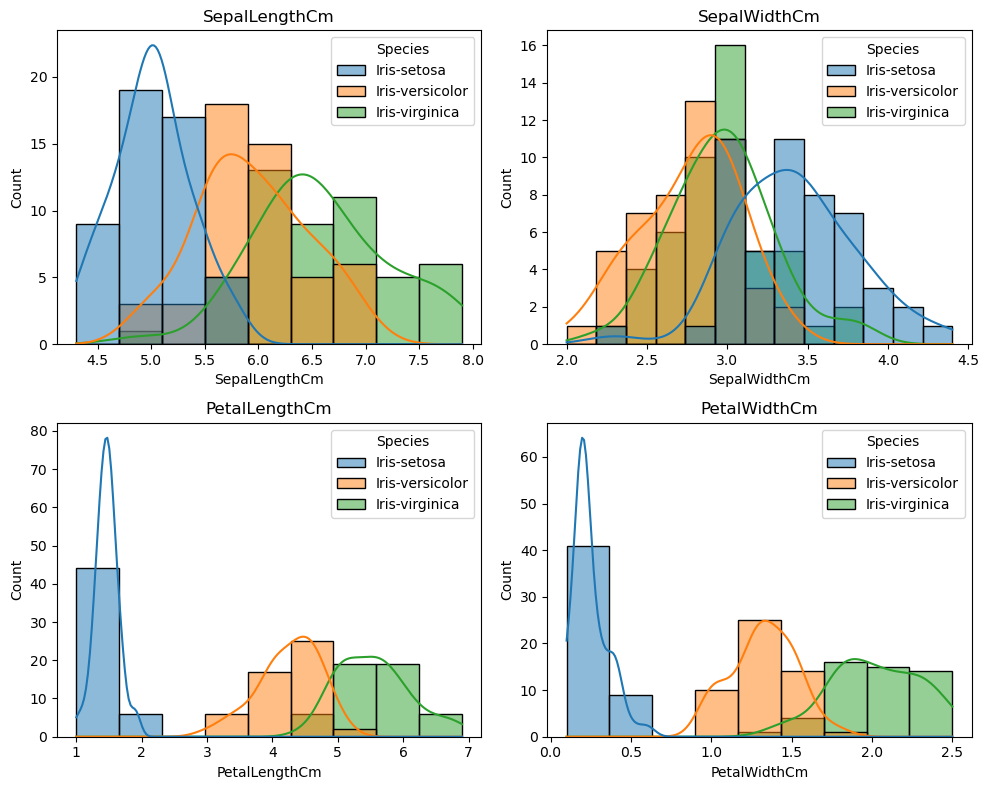

In [15]:
# Set the figure size
plt.figure(figsize=(10,8)) 

# Loop through numeric columns and create histogram
for i, col in enumerate(iris.select_dtypes(np.number).columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(iris,x=col,hue='Species',kde=True,bins='auto')
    plt.title(col)  

# Adjust subplot layout and display the plot
plt.tight_layout()  
plt.show()

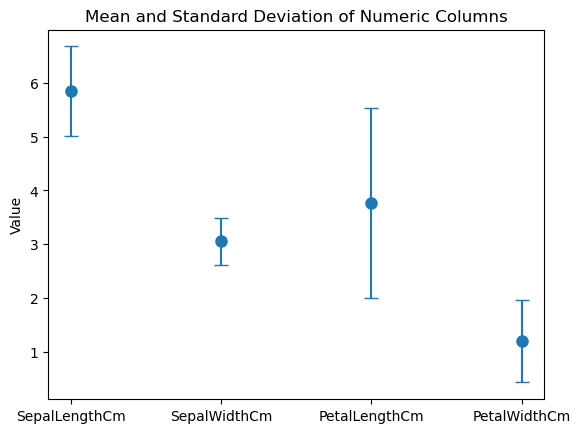

In [16]:
# Create an error bar plot for mean and standard deviation
plt.errorbar(iris.mean().index,iris.mean(), yerr=iris.std(), fmt='o', capsize=5, markersize=8)
plt.title('Mean and Standard Deviation of Numeric Columns')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.show()

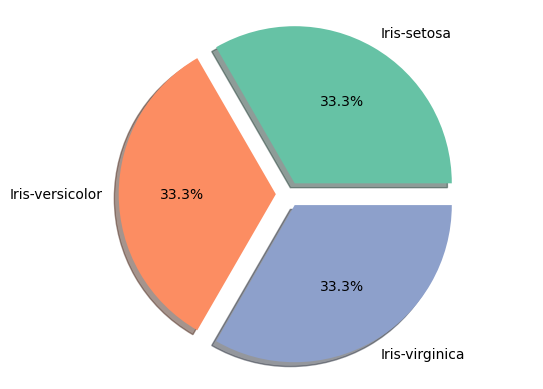

In [17]:
# Create a pie chart to visualize the unique value in the 'Species' column
plt.pie(iris['Species'].value_counts(),labels=iris['Species'].value_counts().index,autopct='%1.1f%%',
        colors=sns.color_palette("Set2"),explode=(0.08,0.08,0.08),shadow=True)

# Set the aspect ratio to be equal to make it a circular pie chart
plt.axis('equal')
# Display the pie chart
plt.show()

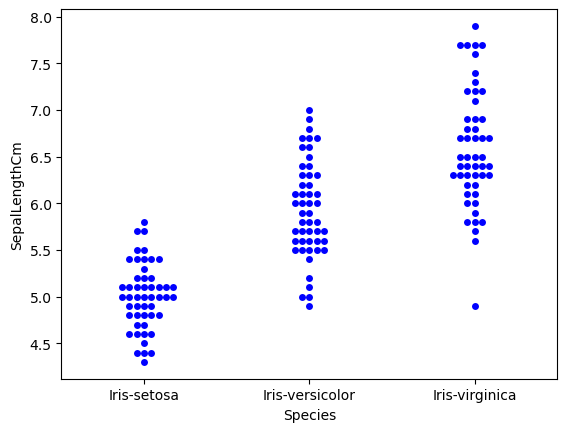

In [18]:
# Create a swarmplot to visualize the distribution of Sepal Length by species.
sns.swarmplot(x='Species', y='SepalLengthCm', color='blue', data=iris)
# Display the swarmplot for Sepal Length.
plt.show()

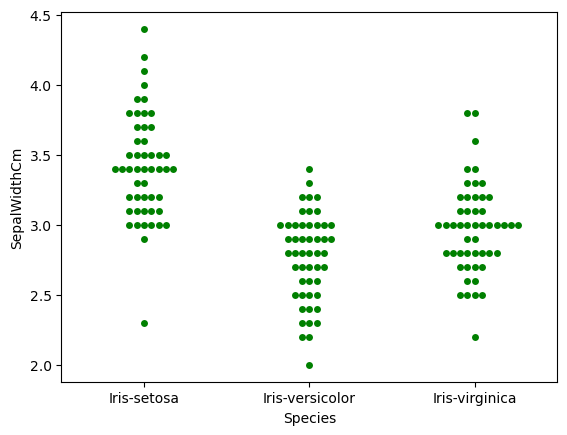

In [19]:
# Create a swarmplot to visualize the distribution of Sepal Width by species.
sns.swarmplot(x='Species', y='SepalWidthCm', color='green', data=iris)
# Display the swarmplot for Sepal Width.
plt.show()

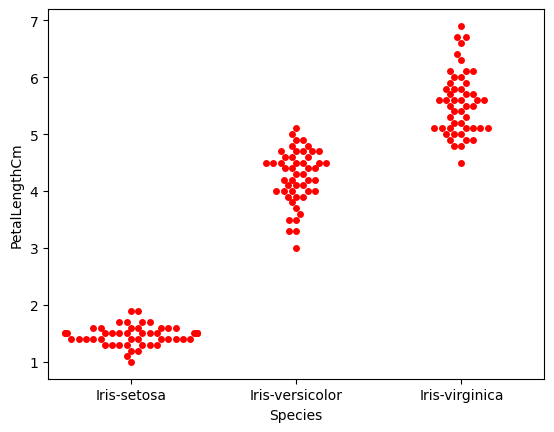

In [20]:
# Create a swarmplot to visualize the distribution of Petal Length by species.
sns.swarmplot(x='Species', y='PetalLengthCm', color='red', data=iris)
# Display the swarmplot for Petal Length.
plt.show()

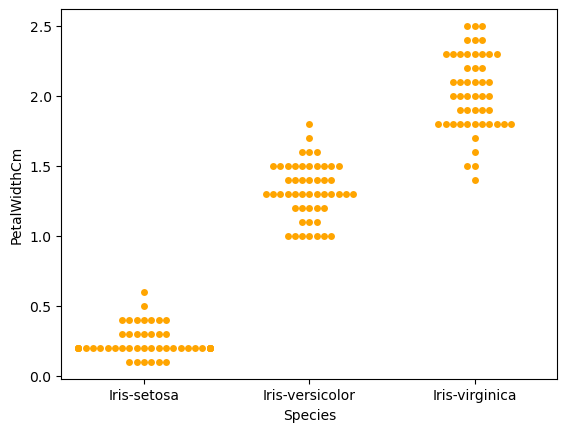

In [21]:
# Create a swarmplot to visualize the distribution of Petal Width by species.
sns.swarmplot(x='Species', y='PetalWidthCm', color='orange', data=iris)
# Display the swarmplot for Petal Width.
plt.show()

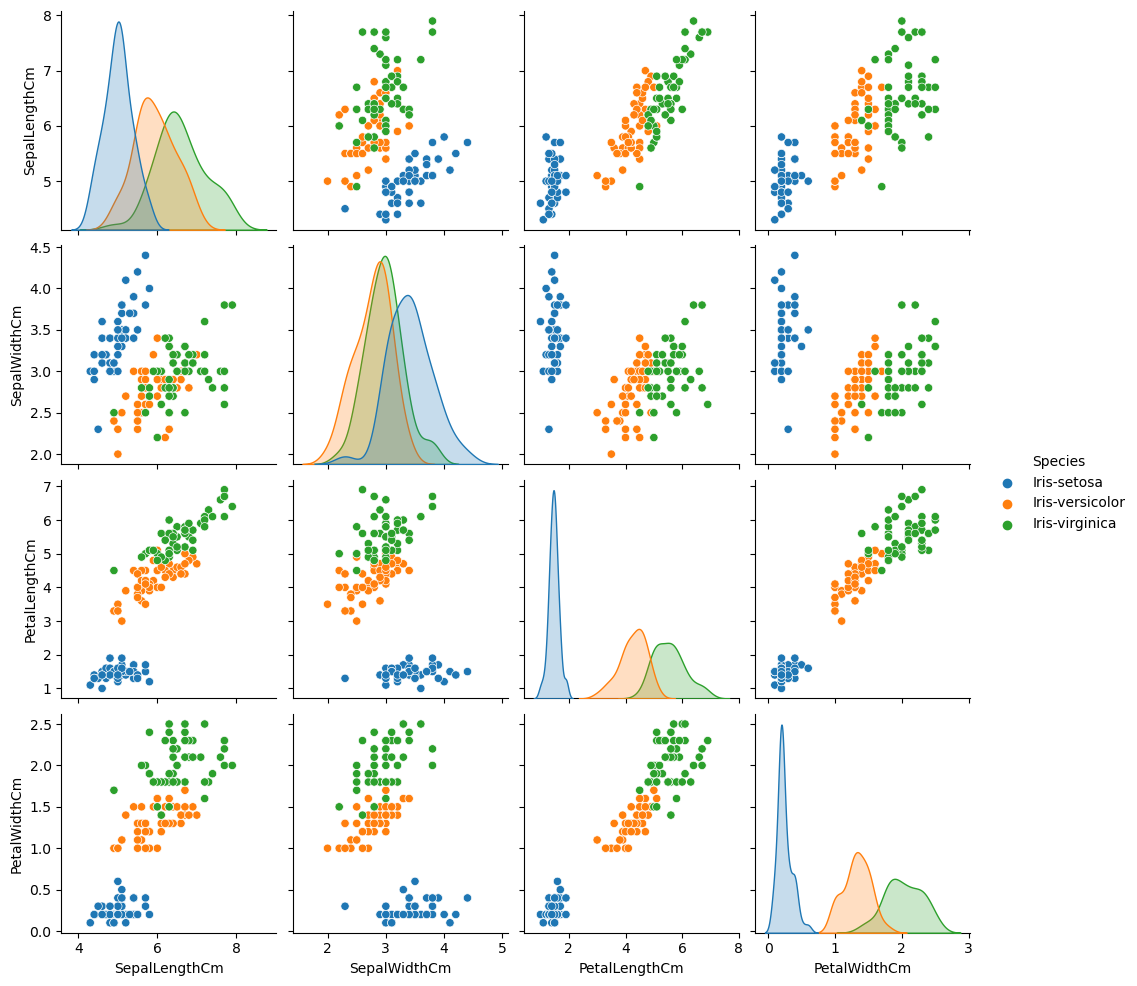

In [22]:
#Create a pair plot of the 'iris' DataFrame, which is a scatterplot matrix showing relationships between pairs of variables.
sns.pairplot(iris,hue='Species')
# Display the pair plot.
plt.show()

# Checking Outliers

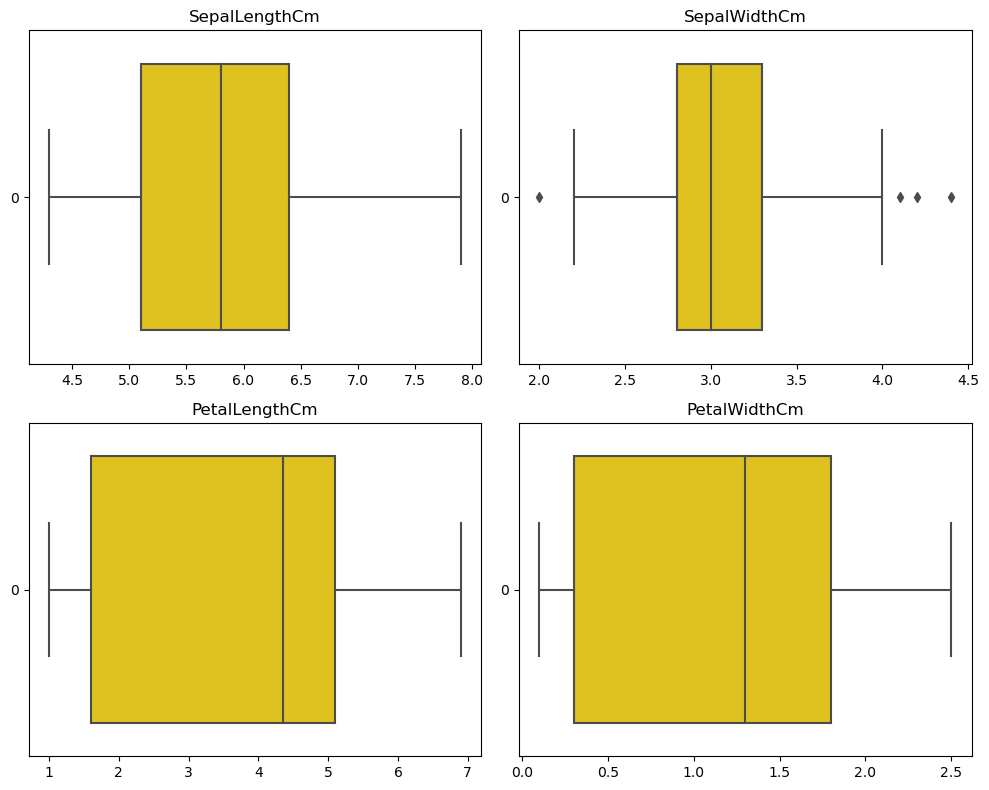

In [23]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Loop through numeric columns and create boxplot
for i, col in enumerate(iris.select_dtypes(np.number).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(iris[col],orient='h',color='gold')
    plt.title(col)  

# Adjust subplot layout and display the plot
plt.tight_layout()  
plt.show()

# Handling outliers

In [24]:
# Function to remove outliers from a specified column
def remove_outliers(data, col):
    Q1, Q3 = data[col].quantile([0.25, 0.75])  # Calculate 1st and 3rd quartiles
    IQR = Q3 - Q1  # Calculate the interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Calculate the lower bound
    upper_bound = Q3 + 1.5 * IQR  # Calculate the upper bound
    # Replace outliers with bounds
    return np.where(data[col] < lower_bound, lower_bound, np.where(data[col] > upper_bound, upper_bound, data[col])) 
    
iris['SepalWidthCm'] = remove_outliers(iris, 'SepalWidthCm')

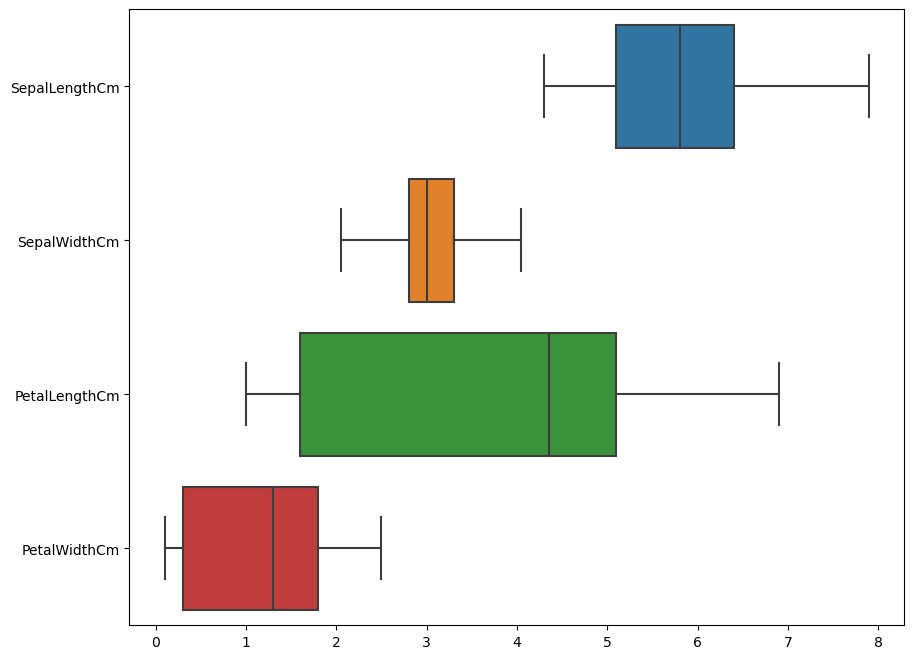

In [25]:
# Set figure size
plt.figure(figsize=(10,8))

# Create a horizontal boxplot 
sns.boxplot(iris, orient='h')

# Display the plot
plt.show()

## Encoding Categorical Data

In [26]:
# Create a LabelEncoder object
le=LabelEncoder()
# Use LabelEncoder to transform the 'Species' column into numeric values
iris['Species']=le.fit_transform(iris['Species'])
# Count the occurrences of each unique value in the 'Species' column
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# Data Splitting and Balancing

In [27]:
# Extract the feature columns
x=iris.iloc[:,:4]
# Display the first few rows of the feature data (x)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# Extract the target column (the 'Species' column)
y=iris.iloc[:,4]
# Display the first few rows of the target data (y)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [29]:
# Split the dataset into training and testing sets, with 80% for training and 20% for testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Training

In [30]:
# Create a Logistic Regression classifier
lr=LogisticRegression()
# Train (fit) the Logistic Regression model on the training data
lr.fit(xtrain,ytrain)

LogisticRegression()

In [31]:
# Use the trained model to make predictions on the test data
pred=lr.predict(xtest)
pred[:20]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2])

# Model Evaluation

In [32]:
train=lr.score(xtrain,ytrain)
test=lr.score(xtest,ytest)
print("Training Score:",train)
print("Testing Score:",test)

Training Score: 0.9666666666666667
Testing Score: 1.0


In [33]:
accuracy=accuracy_score(ytest,pred)
print(" Accuracy Score:",accuracy)
print('****'*30)
cm=confusion_matrix(ytest,pred)
print(" Confusion Matrix:\n",  cm)
print('****'*30)
cr=classification_report(ytest,pred)
print(" Classification Report:\n\n",cr)
print('****'*30)

 Accuracy Score: 1.0
************************************************************************************************************************
 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
************************************************************************************************************************
 Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

************************************************************************************************************************


In conclusion, the machine learning model's performance on the dataset is exceptional, with an accuracy score of 1.0, indicating that it correctly classified all data points. The confusion matrix further supports this, showing that there were no misclassifications among the three classes. 

The classification report reaffirms the model's precision, recall, and F1-score, all of which are perfect for each class, demonstrating the model's ability to classify the data accurately. 

In summary, the model achieved a flawless classification on the provided dataset, and the results suggest that it is highly effective in accurately categorizing the data into its respective classes.

# Model Saving and Loading

In [34]:
# Import the joblib library, which is used for saving and loading machine learning models.
import joblib
# Save the 'lr' (Logistic Regression) model to a file named "Iris_Flower_Classification.joblib".
joblib.dump(lr,"Iris_Flower_Classification.joblib")

['Iris_Flower_Classification.joblib']

In [35]:
# Load the saved model from the file "Iris_Flower_Classification.joblib" and assign it to 'lr_model'.
lr_model=joblib.load("Iris_Flower_Classification.joblib")

# Accepting User Input and Making Predictions for New Data

In [36]:
print("Please enter the following values for Iris Flower Classification:")
# Prompt the user to enter the values for sepal length, sepal width, petal length, and petal width.
SL=float(input("SepalLenghtCm: "))
SW=float(input("SepalWidthCm: "))
PL=float(input("PetalLenghtCm: "))
PW=float(input("PetalWidthCm: "))
# Create a list 'new_data' containing the user-entered values as a sub-list.
new_data=[[SL,SW,PL,PW]]
# Use the 'lr_model' to predict the Iris species based on the user's input.
prediction=lr_model.predict(new_data)
# Check the prediction and print the corresponding Iris species.
if prediction == 0:
    print("\nIris-setosa")
elif prediction == 1:
    print("\nIris-versicolor")
else:
    print("\nIris-virginica")

Please enter the following values for Iris Flower Classification:
SepalLenghtCm: 6.8
SepalWidthCm: 4.9
PetalLenghtCm: 3.6
PetalWidthCm: 1.1

Iris-versicolor
